In [1]:
import pandas as pd

df = pd.read_csv('data/data_v4/csv/digits.csv')

df.head()

,evtId,ipad,itime,amp,crossing_angle,dip_angle,drift_length,pad_coordinate
0,0,41,33,7.695,-8.695,32.201,35.936,41.844
1,0,41,34,83.630,-8.695,32.201,35.936,41.844
2,0,41,35,247.400,-8.695,32.201,35.936,41.844
3,0,41,36,273.400,-8.695,32.201,35.936,41.844
4,0,41,37,131.000,-8.695,32.201,35.936,41.844


In [7]:
from data import preprocessing
data, features = preprocessing.read_csv_2d(filename='data/data_v4/csv/digits.csv', strict=False)
features = features.astype('float32')

ValueError: need at least one array to stack

In [8]:
import numpy as np

pad_range=(40, 50)
time_range=(265, 280)

def sel(df, col, limits):
    return (df[col] >= limits[0]) & (df[col] < limits[1])

selection = sel(df, 'itime', time_range) & sel(df, 'ipad', pad_range)
g = df[selection].groupby('evtId')
bad_ids = df[~selection]['evtId'].unique()
anti_selection = df['evtId'].apply(lambda x: x in bad_ids)
anti_g = df[anti_selection].groupby('evtId')

def convert_event(event):
    result = np.zeros(dtype=float, shape=(pad_range[1] - pad_range[0], time_range[1] - time_range[0]))

    indices = tuple(event[['ipad', 'itime']].values.T - np.array([[pad_range[0]], [time_range[0]]]))
    result[indices] = event.amp.values

    return result

data = np.stack(g.apply(convert_event).values)

data.shape

(1840, 10, 15)

In [10]:
df.columns

Index(['evtId', 'ipad', 'itime', 'amp', 'crossing_angle', 'dip_angle',
       'drift_length', 'pad_coordinate'],
      dtype='object')

In [15]:
features_preprocessed = g[df.columns].mean().values

In [14]:
from scalers import get_scaler

scaler = get_scaler("gaussian")
scaler.scale(data).astype('float32')

/Users/karim/Desktop/tpc-gen-torch/scalers.py:29: RuntimeWarning: divide by zero encountered in true_divide
  result[:, 4] /= result[:, 2] * result[:, 3]
/Users/karim/Desktop/tpc-gen-torch/scalers.py:29: RuntimeWarning: invalid value encountered in true_divide
  result[:, 4] /= result[:, 2] * result[:, 3]


array([[ 2.9753313 ,  0.06362024,  0.16817413,  0.0595727 ,  0.15665102,
         4.4624076 ],
       [ 4.2912683 , 13.928045  ,  0.33154184,  0.06677707,  0.94664204,
         4.3391843 ],
       [ 1.0715226 , 13.839297  ,  0.35325104,  0.1503768 ,  0.31451076,
         6.096061  ],
       ...,
       [ 1.8894655 ,  0.07076644,  0.2817392 ,  0.06575856, -0.49460503,
         4.3175416 ],
       [ 3.482025  , 13.785351  ,  0.38039842,  0.20097865,  0.40262106,
         6.0281916 ],
       [ 3.8412378 , 11.970662  ,  0.41154647,  1.2409699 ,  0.02517039,
         8.403825  ]], dtype=float32)

In [17]:
features_preprocessed.shape[0]

1840

In [22]:
%matplotlib inline

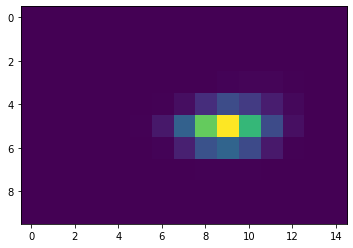

In [27]:
import matplotlib.pyplot as plt

plt.imshow(data[120])